## CIFAR-10 Softmax

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [16]:
# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [18]:
# Define the model
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.9178 - accuracy: 0.3137 - val_loss: 1.8038 - val_accuracy: 0.3626
Epoch 2/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.7579 - accuracy: 0.3730 - val_loss: 1.7363 - val_accuracy: 0.3750
Epoch 3/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6930 - accuracy: 0.3958 - val_loss: 1.6971 - val_accuracy: 0.3950
Epoch 4/10
1407/1407 [==============================] - 12s 8ms/step - loss: 1.6543 - accuracy: 0.4089 - val_loss: 1.6710 - val_accuracy: 0.4050
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6320 - accuracy: 0.4172 - val_loss: 1.6367 - val_accuracy: 0.4110
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6087 - accuracy: 0.4281 - val_loss: 1.6407 - val_accuracy: 0.4086
Epoch 7/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5984 - accuracy: 0.4310 - val_loss: 1.6066 - val_accur

In [21]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 1.6132 - accuracy: 0.4115
Test accuracy: 0.4115000069141388


In [26]:
# Predict the class of a sample image
# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
img = x_test[0]
img = np.expand_dims(img, axis=0)
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])
print('Predicted class:', class_names[predicted_class])
actual_class = np.argmax(y_test[0])
print('Actual class:',  class_names[actual_class])

1/1 [==============================] - 0s 27ms/step
Predicted class: cat
Actual class: cat


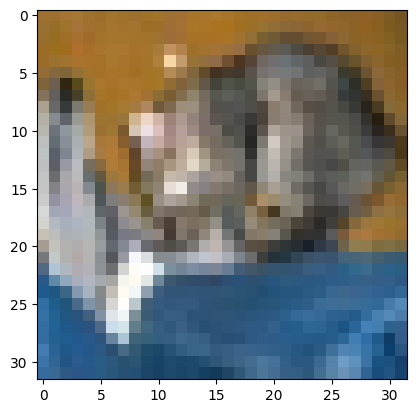

In [25]:
# Plot the sample image
plt.imshow(x_test[0])
plt.show()